In [5]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.preprocessing import PolynomialFeatures
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

#产生n组点
def generate(n, p=0.1):
    X = np.random.uniform(-1, 1, size=(n, 2))
    y = np.sign(np.sum(X ** 2, axis=1) - 0.6)
    #翻转
    P = np.random.uniform(0, 1, n)
    y[P < p] *= -1
    #产生数据
    return X, y

#数据数量
n = 1000
#实验次数
m = 1000     
X, y = generate(n)
print(X)
print("\n")
print(y)
#plt.scatter(X[y>0][:, 0], X[y>0][:, 1], s=1)
#plt.scatter(X[y<0][:, 0], X[y<0][:, 1], s=1)
#plt.show()

[[-0.73698444 -0.80960184]
 [-0.74031313 -0.87669694]
 [-0.30810509 -0.46864533]
 ...
 [ 0.23137755  0.21470258]
 [-0.67132677  0.33225116]
 [ 0.23164839  0.46975142]]


[ 1. -1. -1.  1.  1. -1. -1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1.
 -1.  1.  1.  1.  1. -1. -1. -1. -1.  1.  1.  1.  1. -1.  1.  1. -1.  1.
 -1. -1.  1.  1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1. -1.  1.
  1. -1. -1. -1. -1. -1. -1.  1. -1. -1.  1.  1.  1.  1. -1.  1. -1. -1.
  1.  1. -1. -1.  1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1. -1.  1.
 -1. -1. -1.  1.  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1.  1. -1.  1.
  1. -1.  1.  1.  1. -1.  1.  1.  1. -1.  1.  1.  1.  1. -1. -1.  1. -1.
 -1.  1.  1.  1. -1. -1. -1.  1. -1.  1.  1. -1.  1. -1.  1.  1. -1. -1.
  1.  1. -1.  1. -1.  1. -1. -1. -1.  1. -1. -1. -1.  1.  1.  1.  1.  1.
 -1. -1. -1.  1.  1. -1. -1. -1.  1.  1.  1.  1. -1.  1. -1.  1. -1. -1.
  1. -1.  1.  1. -1.  1. -1. -1.  1.  1. -1. -1.  1.  1. -1. -1.  1. -1.
  1. -1. -1.  1.  1.  1.  1

0.50681


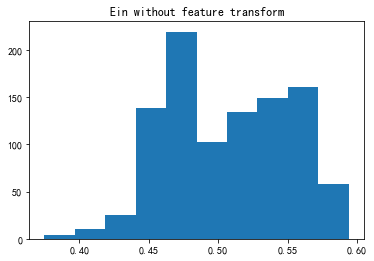

In [2]:
#Problem 13
Ein = np.array([])
for i in range(m):
    X, y = generate(n)
    X = np.c_[np.ones(n), X]

    w = inv(X.T.dot(X)).dot(X.T).dot(y)

    ein = np.mean(np.sign(X.dot(w) * y) < 0 )
    Ein = np.append(Ein, ein)

print(np.average(Ein))
plt.hist(Ein)
plt.title('Ein without feature transform')
plt.show()


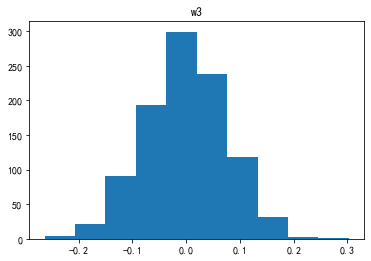

w3的均值-0.0013137628451122322
w的均值[-9.92458498e-01  2.39596030e-03  9.13118391e-04  1.55861227e+00
 -1.31376285e-03  1.55872911e+00]


In [3]:
#Problem 14
#多项式转换器
poly = PolynomialFeatures(2)
W = []
Eout = np.array([])
Ein = np.array([])
for i in range(m):
    X, y = generate(n)
    X_poly = poly.fit_transform(X)
    
    w_poly = inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)

    ein = np.mean(np.sign(X_poly.dot(w_poly) * y) < 0)
    Ein = np.append(Ein, ein)
    #测试数据
    X_test, y_test = generate(n)
    X_test_poly = poly.fit_transform(X_test)
    eout = np.mean(np.sign(X_test_poly.dot(w_poly) * y_test) < 0)
    Eout  = np.append(Eout, eout)
    
    #记录w
    W.append(w_poly)

W = np.array(W)
w3 = W[:, 4]
plt.hist(w3)
plt.title('w3')
plt.show()
print("w3的均值{}".format(w3.mean()))
print("w的均值" + str(np.mean(W, axis=0)))

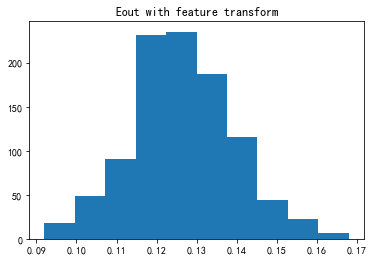

0.126333


In [4]:
#Problem 15
plt.hist(Eout)
plt.title('Eout with feature transform')
plt.show()
print(Eout.mean())